To start with, I have taken ideas from the following code esp. to see how GCN works. Although, it does not use any CNN. 

Node classification with Graph Convolutional Network (GCN). https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html 

In [1]:
# import libraries

import os
import pandas as pd

In [3]:
# Import Libraries for Graph, GNN, and GCN

import stellargraph as sg
from stellargraph import StellarGraph

from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

2024-08-15 12:34:40.266498: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 12:34:40.267867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 12:34:40.291667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 12:34:40.292487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 12:34:40.725762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [5]:
# Machine Learnig related library Imports

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
drop_rows_with_na = 1

In [9]:
df = pd.DataFrame();
data_file = "small-stock-price--all-merged.csv"
# stock-price--all-merged.csv"
df = pd.read_csv("./data/" + data_file);
df.head()

,Unnamed: 0,Ticker,Date,Low,Open,Volume,High,Close,Adjusted Close
0,0,WY,03-05-1973,18.458332,18.833332,116700,19.333332,19.083332,1.415370
1,1,WY,04-05-1973,19.583332,19.583332,256800,19.958332,19.666668,1.458635
2,2,WY,07-05-1973,19.541668,19.666668,55800,19.708332,19.583332,1.452454
3,3,WY,08-05-1973,19.416668,19.583332,80100,19.583332,19.583332,1.452454
4,4,WY,09-05-1973,19.541668,19.583332,66900,19.791668,19.666668,1.458635


In [11]:
df_s =  df[ ['Ticker', 'Date', 'Adjusted Close'] ];
df_s

,Ticker,Date,Adjusted Close
0,WY,03-05-1973,1.415370
1,WY,04-05-1973,1.458635
2,WY,07-05-1973,1.452454
3,WY,08-05-1973,1.452454
4,WY,09-05-1973,1.458635
...,...,...,...
74640,ZTS,06-12-2022,153.050003
74641,ZTS,07-12-2022,150.250000
74642,ZTS,08-12-2022,153.679993
74643,ZTS,09-12-2022,153.389999


In [13]:
df_s.shape

(74645, 3)

In [76]:


# Convert 'Date' column to datetime, letting Pandas infer the format
df_s["Date"] = pd.to_datetime(df_s["Date"], errors='coerce')

# Sort the DataFrame by 'Date'
df_s = df_s.sort_values(by='Date', ascending=True)

# Display the DataFrame
print(df_s)


      Ticker       Date  Adjusted Close
33545    XOM 1970-01-04        0.157565
33567    XOM 1970-01-05        0.147974
33588    XOM 1970-01-06        0.158475
33610    XOM 1970-01-07        0.152206
33653    XOM 1970-01-09        0.184500
...      ...        ...             ...
74632    ZTS        NaT      150.470001
74633    ZTS        NaT      150.100006
74634    ZTS        NaT      148.130005
74635    ZTS        NaT      147.850006
74636    ZTS        NaT      154.139999

[74645 rows x 3 columns]


In [19]:
# DataFrame.pivot_table
df_s_pivot = df_s.pivot_table(index = 'Ticker', columns = 'Date', values = 'Adjusted Close')
df_s_pivot

Date,01-02-1971,01-02-1972,01-02-1973,01-02-1974,01-02-1977,01-02-1978,01-02-1979,01-02-1980,01-02-1982,01-02-1983,...,31-12-2009,31-12-2010,31-12-2012,31-12-2013,31-12-2014,31-12-2015,31-12-2018,31-12-2019,31-12-2020,31-12-2021
Ticker,,,,,,,,,,,,,,,,,,,,,
WY,NaN,NaN,NaN,1.885100,2.012056,1.225056,1.536462,1.821926,1.541208,2.259849,...,10.259043,12.284119,19.117323,22.297297,26.165010,22.732100,18.656504,27.158773,30.700102,38.965187
WYNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.204308,73.964508,91.729721,165.950317,131.287323,62.666248,94.978737,137.714386,112.830002,85.040001
XEL,NaN,NaN,NaN,1.008796,1.184458,1.043928,0.973664,0.828116,1.033891,1.214571,...,13.687512,15.889650,19.528238,21.244215,28.359310,29.449564,44.527931,58.942188,63.521393,66.316925
XLEFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.137200,0.151600,0.058500,0.087000,0.098000,0.060700,0.193100,0.085000,0.206000,0.233300
XOM,0.206687,0.227523,0.301862,0.285793,0.439392,0.399459,0.469953,0.623950,0.703863,0.797839,...,41.415253,45.610184,56.669090,68.070015,63.947742,55.767654,54.603767,58.553173,37.350468,58.855209
XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.708212,30.786577,34.347809,33.462044,63.582310,76.037262,99.533028,118.379974
YUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.549164,28.009109,39.412952,45.784870,45.027046,46.153839,85.595673,95.365997,104.756699,136.241257
ZBH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.388924,47.576355,59.737072,84.346863,103.541145,94.434494,97.903503,142.326599,147.687973,122.551712
ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412998,1.398868,...,10.710710,20.264502,17.972174,25.278742,24.188005,23.337999,36.242443,47.476818,41.223854,61.467342


In [21]:
df_s_pivot = df_s.pivot(index = 'Ticker', columns = 'Date', values = 'Adjusted Close')
df_s_pivot

Date,01-02-1971,01-02-1972,01-02-1973,01-02-1974,01-02-1977,01-02-1978,01-02-1979,01-02-1980,01-02-1982,01-02-1983,...,31-12-2009,31-12-2010,31-12-2012,31-12-2013,31-12-2014,31-12-2015,31-12-2018,31-12-2019,31-12-2020,31-12-2021
Ticker,,,,,,,,,,,,,,,,,,,,,
WY,NaN,NaN,NaN,1.885100,2.012056,1.225056,1.536462,1.821926,1.541208,2.259849,...,10.259043,12.284119,19.117323,22.297297,26.165010,22.732100,18.656504,27.158773,30.700102,38.965187
WYNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.204308,73.964508,91.729721,165.950317,131.287323,62.666248,94.978737,137.714386,112.830002,85.040001
XEL,NaN,NaN,NaN,1.008796,1.184458,1.043928,0.973664,0.828116,1.033891,1.214571,...,13.687512,15.889650,19.528238,21.244215,28.359310,29.449564,44.527931,58.942188,63.521393,66.316925
XLEFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.137200,0.151600,0.058500,0.087000,0.098000,0.060700,0.193100,0.085000,0.206000,0.233300
XOM,0.206687,0.227523,0.301862,0.285793,0.439392,0.399459,0.469953,0.623950,0.703863,0.797839,...,41.415253,45.610184,56.669090,68.070015,63.947742,55.767654,54.603767,58.553173,37.350468,58.855209
XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.708212,30.786577,34.347809,33.462044,63.582310,76.037262,99.533028,118.379974
YUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.549164,28.009109,39.412952,45.784870,45.027046,46.153839,85.595673,95.365997,104.756699,136.241257
ZBH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.388924,47.576355,59.737072,84.346863,103.541145,94.434494,97.903503,142.326599,147.687973,122.551712
ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412998,1.398868,...,10.710710,20.264502,17.972174,25.278742,24.188005,23.337999,36.242443,47.476818,41.223854,61.467342


In [11]:
# df_s_pivot.corr()

In [23]:
df_s_transpose = df_s_pivot.T
df_s_transpose

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,
01-02-1971,NaN,NaN,NaN,NaN,0.206687,NaN,NaN,NaN,NaN,NaN
01-02-1972,NaN,NaN,NaN,NaN,0.227523,NaN,NaN,NaN,NaN,NaN
01-02-1973,NaN,NaN,NaN,NaN,0.301862,NaN,NaN,NaN,NaN,NaN
01-02-1974,1.885100,NaN,1.008796,NaN,0.285793,NaN,NaN,NaN,NaN,NaN
01-02-1977,2.012056,NaN,1.184458,NaN,0.439392,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31-12-2015,22.732100,62.666248,29.449564,0.0607,55.767654,33.462044,46.153839,94.434494,23.337999,45.749474
31-12-2018,18.656504,94.978737,44.527931,0.1931,54.603767,63.582310,85.595673,97.903503,36.242443,83.438843
31-12-2019,27.158773,137.714386,58.942188,0.0850,58.553173,76.037262,95.365997,142.326599,47.476818,129.921722


In [25]:
if drop_rows_with_na == 1:
    df_s_transpose = df_s_transpose.dropna(axis=0);
    #df_s_transpose["Date"] = df_s_transpose["Date"].astype('datetime64[ns]')
    #df_s_transpose.sort_values(by='Date', ascending=False)
    df_s_transpose.to_csv('./data/ticker-columns-small-stock-price-all-merged.csv');
   
df_s_transpose.head(100)

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,
01-02-2013,20.883371,103.048119,20.478704,0.05850,58.954189,24.504324,39.336575,65.839821,20.096922,28.952980
01-02-2016,19.782536,60.773312,31.622816,0.06070,54.580055,32.655289,46.492840,91.157463,19.234612,41.104145
01-02-2017,24.578880,90.668427,34.436993,0.05200,61.433521,45.699051,58.627979,110.029305,36.666920,53.362606
01-02-2018,30.465961,160.564102,39.170780,0.25350,68.485405,70.484642,76.855545,119.965019,47.955444,75.582741
01-02-2019,22.829893,121.059235,47.121704,0.19310,60.793613,66.850998,87.653610,110.061195,42.958954,85.167404
...,...,...,...,...,...,...,...,...,...,...
02-03-2022,38.706863,88.629997,66.179787,0.19747,78.315941,87.285889,120.254913,121.906052,66.889503,194.954529
02-04-2013,21.841364,101.328606,21.882168,0.09600,59.686665,23.910618,41.854408,67.692314,20.567228,30.390823
02-04-2014,20.968288,195.460785,23.204342,0.08700,66.350578,33.721264,46.930309,87.613419,26.773081,27.890862


In [78]:
# Assuming df_s_transpose is your DataFrame and you want to convert its index
# Example: Checking the current index format
print(df_s_transpose.index)

# Convert index to datetime, specify format if known or let Pandas infer
df_s_transpose.index = pd.to_datetime(df_s_transpose.index, format='%d-%m-%Y', errors='coerce')

# Verify conversion
print(df_s_transpose.index)
print(df_s_transpose.index.isna().sum())

Index(['01-02-2013', '01-02-2016', '01-02-2017', '01-02-2018', '01-02-2019',
       '01-02-2021', '01-02-2022', '01-03-2013', '01-03-2016', '01-03-2017',
       ...
       '31-10-2018', '31-10-2019', '31-10-2022', '31-12-2013', '31-12-2014',
       '31-12-2015', '31-12-2018', '31-12-2019', '31-12-2020', '31-12-2021'],
      dtype='object', name='Date', length=2483)
DatetimeIndex(['2013-02-01', '2016-02-01', '2017-02-01', '2018-02-01',
               '2019-02-01', '2021-02-01', '2022-02-01', '2013-03-01',
               '2016-03-01', '2017-03-01',
               ...
               '2018-10-31', '2019-10-31', '2022-10-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=2483, freq=None)
0


# Note: the above data has null and missing values. That will be addressed.

In [15]:
# Experiment find correlations
# Ref: https://towardsdatascience.com/time-series-and-correlations-with-stock-market-data-using-python-e66774e3a16f

In [16]:
# df_s_transpose = df_s_transpose.fillna(0);

# Pearson Correlation Coefficient

In [29]:
df_s_transpose_pearson = df_s_transpose.corr()
df_s_transpose_pearson

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.000000,-0.096668,0.649323,0.572186,0.372683,0.725986,0.714593,0.595592,0.840381,0.718518
WYNN,-0.096668,1.000000,-0.386965,0.002870,0.005917,-0.192025,-0.267199,-0.109233,-0.071168,-0.348395
XEL,0.649323,-0.386965,1.000000,0.634048,0.021992,0.907268,0.946322,0.781452,0.773665,0.948077
XLEFF,0.572186,0.002870,0.634048,1.000000,0.072248,0.695186,0.695990,0.488452,0.688164,0.675154
XOM,0.372683,0.005917,0.021992,0.072248,1.000000,0.030656,0.133538,-0.188314,0.307871,-0.010085
XYL,0.725986,-0.192025,0.907268,0.695186,0.030656,1.000000,0.955698,0.810726,0.865556,0.941812
YUM,0.714593,-0.267199,0.946322,0.695990,0.133538,0.955698,1.000000,0.764817,0.878860,0.954247
ZBH,0.595592,-0.109233,0.781452,0.488452,-0.188314,0.810726,0.764817,1.000000,0.631353,0.756662
ZION,0.840381,-0.071168,0.773665,0.688164,0.307871,0.865556,0.878860,0.631353,1.000000,0.813806


# Pearson Correlation Coefficient based Adjacency Graph Matrix

In [18]:
df_s_transpose_pearson[df_s_transpose_pearson >= 0.5] = 1
df_s_transpose_pearson[df_s_transpose_pearson < 0.5] = 0
df_s_transpose_pearson

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
WYNN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XEL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
XLEFF,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
XOM,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
XYL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
YUM,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ZBH,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
ZION,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Spearman Correlation Coefficient 

In [31]:
df_s_transpose_spearman = df_s_transpose.corr(method='spearman')
df_s_transpose_spearman

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.000000,-0.024507,0.656217,0.446881,0.197225,0.721356,0.677714,0.646461,0.764333,0.688669
WYNN,-0.024507,1.000000,-0.361188,0.055383,0.172181,-0.179372,-0.249199,-0.109099,-0.014040,-0.335967
XEL,0.656217,-0.361188,1.000000,0.592792,-0.119004,0.940604,0.948714,0.815851,0.794496,0.969704
XLEFF,0.446881,0.055383,0.592792,1.000000,-0.022676,0.642227,0.645913,0.438980,0.648388,0.629287
XOM,0.197225,0.172181,-0.119004,-0.022676,1.000000,-0.071883,-0.053836,-0.207490,0.125050,-0.170009
XYL,0.721356,-0.179372,0.940604,0.642227,-0.071883,1.000000,0.962513,0.844919,0.874153,0.954748
YUM,0.677714,-0.249199,0.948714,0.645913,-0.053836,0.962513,1.000000,0.823905,0.881926,0.963845
ZBH,0.646461,-0.109099,0.815851,0.438980,-0.207490,0.844919,0.823905,1.000000,0.675687,0.837512
ZION,0.764333,-0.014040,0.794496,0.648388,0.125050,0.874153,0.881926,0.675687,1.000000,0.835269


# Spearman Correlation Coefficient based Adjacency Graph Matrix

In [33]:
df_s_transpose_spearman[df_s_transpose_spearman >= 0.4] = 1
df_s_transpose_spearman[df_s_transpose_spearman < 0.4] = 0
df_s_transpose_spearman

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
WYNN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XEL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
XLEFF,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
XOM,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
XYL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
YUM,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ZBH,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ZION,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Find Kendall Correlation Coefficient

In [35]:
df_s_transpose_kendall = df_s_transpose.corr(method='kendall')
df_s_transpose_kendall

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.000000,-0.008544,0.496151,0.287353,0.135625,0.540468,0.517248,0.464727,0.583282,0.533627
WYNN,-0.008544,1.000000,-0.253453,0.033290,0.142122,-0.108556,-0.152433,-0.059714,0.021557,-0.219898
XEL,0.496151,-0.253453,1.000000,0.382282,-0.096051,0.771179,0.795176,0.623614,0.563132,0.840853
XLEFF,0.287353,0.033290,0.382282,1.000000,-0.016651,0.414277,0.429430,0.299577,0.455170,0.403436
XOM,0.135625,0.142122,-0.096051,-0.016651,1.000000,-0.029698,-0.033426,-0.114000,0.089203,-0.124349
XYL,0.540468,-0.108556,0.771179,0.414277,-0.029698,1.000000,0.829498,0.655981,0.670453,0.812713
YUM,0.517248,-0.152433,0.795176,0.429430,-0.033426,0.829498,1.000000,0.630930,0.682253,0.841465
ZBH,0.464727,-0.059714,0.623614,0.299577,-0.114000,0.655981,0.630930,1.000000,0.472226,0.640518
ZION,0.583282,0.021557,0.563132,0.455170,0.089203,0.670453,0.682253,0.472226,1.000000,0.621643


# Kendall Correlation Coefficient based Adjacency Graph Matrix

In [37]:
df_s_transpose_kendall[df_s_transpose_kendall >= 0.3 ] = 1
df_s_transpose_kendall[df_s_transpose_kendall < 0.3 ] = 0
df_s_transpose_kendall

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,
WY,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
WYNN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XEL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
XLEFF,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
XOM,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
XYL,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
YUM,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ZBH,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
ZION,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


Create and visualize the Graphs

In [40]:
import networkx as nx
Graph_pearson = nx.Graph(df_s_transpose_pearson)

In [42]:
Graph_spearman = nx.Graph(df_s_transpose_spearman)
Graph_kendall = nx.Graph(df_s_transpose_kendall)

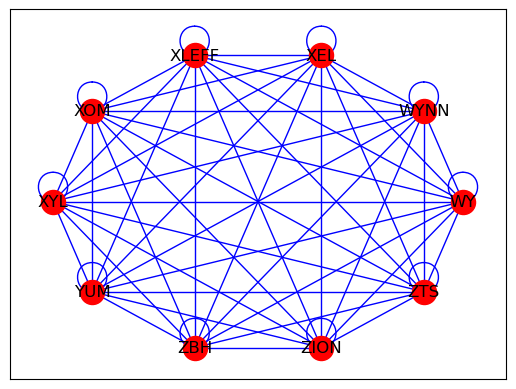

In [44]:
nx.draw_networkx(Graph_pearson, pos=nx.circular_layout(Graph_pearson), node_color='r', edge_color='b')

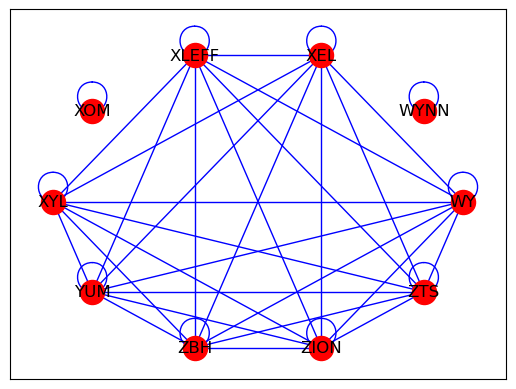

In [46]:
nx.draw_networkx(Graph_spearman, pos=nx.circular_layout(Graph_spearman), node_color='r', edge_color='b')

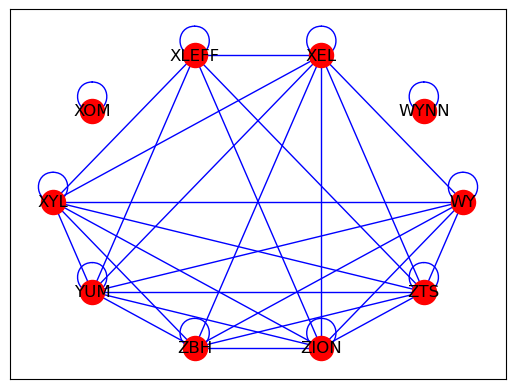

In [48]:
nx.draw_networkx(Graph_kendall, pos=nx.circular_layout(Graph_kendall), node_color='r', edge_color='b')

# Create GCN layer. Pearson

# Find all stocks = nodes

In [50]:
# improvement: make sure only stocks/nodes that are in the graph are taken
all_stock_nodes = df_s_transpose_pearson.index.to_list()
all_stock_nodes

['WY', 'WYNN', 'XEL', 'XLEFF', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

# Find all edges between nodes

In [52]:
source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_pearson[aStock][anotherStock] > 0:
            #print(df_s_transpose_pearson[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)
            
source, target, edge_feature            

(['WY',
  'WY',
  'WY',
  'WY',
  'WY',
  'WY',
  'WY',
  'WY',
  'WY',
  'WYNN',
  'WYNN',
  'WYNN',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XEL',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XLEFF',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'XYL',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'YUM',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZBH',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZION',
  'ZTS',
  'ZTS',
  'ZTS',
  'ZTS',
  'ZTS',
  'ZTS',
  'ZTS',
  'ZTS'],
 ['WY',
  'XEL',
  'XLEFF',
  'XOM',
  'XYL',
  'YUM',
  'ZBH',
  'ZION',
  'ZTS',
  'WYNN',
  'XLEFF',
  'XOM',
  'WY',
  'XEL',
  'XLEFF',
  'XOM',
  'XYL',
  'YUM',
  'ZBH',
  'ZION',
  'ZTS',
  'WY',
  'WYNN',
  'XEL',
  'XLEFF',
  'X

In [58]:
# https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html
pearson_edges = pd.DataFrame(
    {"source": source, "target": target}
)

pearson_edges_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_feature}
)


pearson_edges[:10]

,source,target
0,WY,WY
1,WY,XEL
2,WY,XLEFF
3,WY,XOM
4,WY,XYL
5,WY,YUM
6,WY,ZBH
7,WY,ZION
8,WY,ZTS
9,WYNN,WYNN


In [31]:
# Graph with No Feature Data, No node data, only edges

pearson_graph = StellarGraph(edges = pearson_edges, node_type_default="corner", edge_type_default="line")
#pearson_graph = StellarGraph(nodes = all_stock_nodes, edges = pearson_edges)
# graph = sg.StellarGraph(all_stock_nodes, square_edges)
print(pearson_graph.info())

In [32]:
# Trying to have the time series data as part of the nodes

In [60]:
df_s_transpose

Ticker,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,
01-02-2013,20.883371,103.048119,20.478704,0.0585,58.954189,24.504324,39.336575,65.839821,20.096922,28.952980
01-02-2016,19.782536,60.773312,31.622816,0.0607,54.580055,32.655289,46.492840,91.157463,19.234612,41.104145
01-02-2017,24.578880,90.668427,34.436993,0.0520,61.433521,45.699051,58.627979,110.029305,36.666920,53.362606
01-02-2018,30.465961,160.564102,39.170780,0.2535,68.485405,70.484642,76.855545,119.965019,47.955444,75.582741
01-02-2019,22.829893,121.059235,47.121704,0.1931,60.793613,66.850998,87.653610,110.061195,42.958954,85.167404
...,...,...,...,...,...,...,...,...,...,...
31-12-2015,22.732100,62.666248,29.449564,0.0607,55.767654,33.462044,46.153839,94.434494,23.337999,45.749474
31-12-2018,18.656504,94.978737,44.527931,0.1931,54.603767,63.582310,85.595673,97.903503,36.242443,83.438843
31-12-2019,27.158773,137.714386,58.942188,0.0850,58.553173,76.037262,95.365997,142.326599,47.476818,129.921722


# Structure the Feature Matrix so that it can be passed to the GCN

In [62]:
df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace=False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
df_s_transpose_feature['WY'].values

array([20.88337135, 19.78253555, 24.57888031, ..., 27.15877342,
       30.70010185, 38.96518707])

In [35]:
node_Data = [];
for x in all_stock_nodes:
    node_Data.append( df_s_transpose_feature[x].values)
    
    
node_Data    

[array([20.88337135, 20.43826294, 21.6547451 , ..., 36.49367905,
        34.36982346, 29.22826958]),
 array([103.04811859,  95.82891846, 101.27102661, ...,  68.73999786,
         64.51000214,  58.70999908]),
 array([20.47870445, 20.99048424, 21.830513  , ..., 75.46627808,
        76.90686035, 57.93999863]),
 array([0.0585    , 0.0585    , 0.096     , ..., 0.17937   , 0.178     ,
        0.16500001]),
 array([58.9541893 , 58.92887878, 59.81185532, ..., 93.24932098,
        96.83049011, 97.64394379]),
 array([ 24.50432396,  24.14779091,  23.93696213, ..., 102.76602936,
         97.34002686,  86.98767853]),
 array([ 39.33657455,  38.90701294,  42.46298981, ..., 117.04702759,
        116.72503662, 105.05850983]),
 array([ 65.83982086,  67.20197296,  67.51259613, ..., 116.95837402,
        119.00379181, 107.05999756]),
 array([20.09692192, 20.19755554, 20.81928444, ..., 57.34790802,
        58.14604568, 48.04835129]),
 array([ 28.95298004,  32.30482864,  30.42816925, ..., 175.29751587,
    

In [80]:
# Example data and index
node_Data = [
    [1.2, 3.4, 5.6],
    [7.8, 9.0, 1.2],
    [3.4, 5.6, 7.8]
]
all_stock_nodes = ['NodeA', 'NodeB', 'NodeC']

# Creating the DataFrame
pearson_graph_node_data = pd.DataFrame(node_Data, index=all_stock_nodes)

# Display the DataFrame
print(pearson_graph_node_data)

         0    1    2
NodeA  1.2  3.4  5.6
NodeB  7.8  9.0  1.2
NodeC  3.4  5.6  7.8


# Graph with feature as part of Nodes

In [82]:
pearson_graph_with_node_features = StellarGraph(pearson_graph_node_data, edges = pearson_edges, node_type_default="corner", edge_type_default="line")
print(pearson_graph_with_node_features.info())


ValueError: edges: expected all source and target node IDs to be contained in `nodes`, found some missing: 'WY', 'WYNN', 'XEL', 'XLEFF', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'

In [70]:
# Generator
generator = FullBatchNodeGenerator(pearson_graph_with_node_features, method = "gcn")

NameError: name 'pearson_graph_with_node_features' is not defined

No need for this block

Graph with feature as part of both Nodes and edges
although Edge data is not required


pearson_graph_with_edge_features = StellarGraph(pearson_graph_node_data, edges = pearson_edges, node_type_default="corner", edge_type_default="line")
print(pearson_graph_with_edge_features.info())
generator = FullBatchNodeGenerator(pearson_graph_with_edge_features, method = "gcn")

In [39]:
# Train Test Split

In [40]:
train_subjects, test_subjects = model_selection.train_test_split(
    pearson_graph_node_data #, train_size = 6, test_size = 4
)
# , train_size=6, test_size=None, stratify=pearson_graph_node_data

val_subjects, test_subjects_ = model_selection.train_test_split(
    test_subjects #, test_size = 2
)

#, train_size=500, test_size=None, stratify=test_subjects

#val_subjects, test_subjects = model_selection.train_test_split(
#    test_subjects, train_size=500, test_size=None, stratify=test_subjects
#)

train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_.shape

((7, 2483), (3, 2483), (2, 2483), (1, 2483))

In [41]:
pearson_graph_node_data

,0,1,2,3,4,5,6,7,8,9,...,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482
WY,20.883371,20.438263,21.654745,20.832233,19.546804,19.692883,20.427731,21.428579,21.841364,20.908264,...,31.038254,31.585228,32.529999,38.842178,38.972717,37.633583,34.238174,36.493679,34.369823,29.228270
WYNN,103.048119,95.828918,101.271027,111.982628,106.370384,113.806229,133.505219,139.868958,101.328606,112.311447,...,78.199997,80.290001,83.660004,85.800003,71.500000,58.560001,54.730000,68.739998,64.510002,58.709999
XEL,20.478704,20.990484,21.830513,23.203228,20.907310,22.606117,20.919912,21.770561,21.882168,23.136805,...,69.389999,68.849998,70.220001,67.188744,73.714508,72.550545,69.048271,75.466278,76.906860,57.939999
XLEFF,0.058500,0.058500,0.096000,0.087000,0.087000,0.087000,0.087000,0.087000,0.096000,0.087000,...,0.175400,0.175400,0.165000,0.197200,0.230350,0.186830,0.192300,0.179370,0.178000,0.165000
XOM,58.954189,58.928879,59.811855,57.663715,59.913769,61.526085,57.455147,60.007206,59.686665,58.401745,...,109.809998,110.540001,111.339996,68.425552,83.246559,84.787003,83.018562,93.249321,96.830490,97.643944
XYL,24.504324,24.147791,23.936962,24.156570,24.386118,22.216503,25.022806,29.558672,23.910618,24.103863,...,109.610001,109.879997,112.349998,114.688019,84.037300,81.997032,76.324005,102.766029,97.340027,86.987679
YUM,39.336575,38.907013,42.462990,40.536289,42.107372,44.518383,43.120792,41.467388,41.854408,40.824135,...,126.449997,126.040001,128.660004,126.714371,118.175095,108.929268,114.738968,117.047028,116.725037,105.058510
ZBH,65.839821,67.201973,67.512596,67.665359,67.576027,76.108650,74.430153,79.379471,67.692314,68.006851,...,117.669998,119.000000,120.099998,121.143295,126.072327,112.593025,102.800041,116.958374,119.003792,107.059998
ZION,20.096922,20.197556,20.819284,20.315172,24.694487,25.367598,23.557787,23.945360,20.567228,20.710051,...,50.230000,51.029999,51.820000,68.328407,61.841976,52.314281,49.448040,57.347908,58.146046,48.048351
ZTS,28.952980,32.304829,30.428169,31.237307,28.636538,28.276628,29.795467,29.912426,30.390823,31.134403,...,148.130005,147.850006,154.139999,211.260025,186.840927,162.436111,173.123749,175.297516,165.997284,145.550735


In [42]:
train_targets = train_subjects; 
val_targets = val_subjects; 
test_targets = test_subjects; 

In [43]:
train_gen = generator.flow(train_subjects.index, train_targets)

# This was there, but for classification, model does not match. I am changing
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator , dropout=0.5
)
x_inp, x_out = gcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)


In [44]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

# layer_sizes = [32, 1, 32, 1, 32, 1]
# activations = ["relu", 'linear', "relu", 'linear',"relu", 'linear']

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

#x_out = Conv1D(filters = 2, kernel_size = 2)(x_out)
#x_out = MaxPool1D(pool_size=2)(x_out)
#x_out = Conv1D(filters = 32, kernel_size = sum(layer_sizes))(x_out)
#prediction = keras.layers.Reshape((-1,))(prediction)
#x_out = keras.layers.Reshape((1,16))(x_out)
#x_out = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator)(x_out) #, dropout = 0.5

# predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
x_out, 
x_inp, x_out

([<KerasTensor: shape=(1, 10, 2483) dtype=float32 (created by layer 'input_1')>,
  <KerasTensor: shape=(1, None) dtype=int32 (created by layer 'input_2')>,
  <KerasTensor: shape=(1, None, 2) dtype=int64 (created by layer 'input_3')>,
  <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'input_4')>],
 <KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'gather_indices')>)

# Experiment with Models

In [45]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

# layer_sizes = [32, 1, 32, 1, 32, 1]
# activations = ["relu", 'linear', "relu", 'linear',"relu", 'linear']

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()
xout = x_out

#x_out = Conv1D(filters = 7, kernel_size = 7)(x_out)
input_shape = (4, 10, 128)
x_out = Conv1D(32, 3, activation = 'relu', input_shape = x_out[1:] )(x_out)
#x_out = MaxPool1D(pool_size=2)(x_out)
#x_out = Conv1D(filters = 32, kernel_size = sum(layer_sizes))(x_out)
#prediction = keras.layers.Reshape((-1,))(prediction)
#x_out = keras.layers.Reshape((1,16))(x_out)

# Generator
#generator2 = FullBatchNodeGenerator(x_out, method = "gcn")
gcn2 = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator)#(x_out) #, dropout = 0.5

# predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
#x_out, 
x_inp, x_out, type(xout),  vars(gcn), 
x_out[1:]

<KerasTensor: shape=(0, None, 32) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

In [46]:
import tensorflow as tf
input_shape = (4, 10, 128)
x = tf.random.normal(input_shape)
y = keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape[1:])(x)
#print(y.shape)

#https://keras.io/api/layers/convolution_layers/convolution1d
x_out_cnn = Conv1D(32, 3, activation='relu',input_shape=input_shape[1:])(x_out)
x, 
input_shape[1:], x_out_cnn

((10, 128),
 <KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'conv1d_2')>)

In [47]:
# Not my code
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[100.863434]]


x_out, vars(gcn)

In [48]:
# Models

In [49]:
# loss functions: https://keras.io/api/losses/

model = Model(inputs=x_inp, outputs=predictions)
'''
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)
'''
model.compile(loss='mean_absolute_error', optimizer=optimizers.Adam(learning_rate=0.1), metrics=['mean_squared_error'])

In [50]:
len(x_inp) , predictions.shape, print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(1, 10, 2483)]      0           []                               
                                                                                                  
 input_7 (InputLayer)           [(1, None, 2)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(1, None)]          0           []                               
                                                                                                  
 dropout_2 (Dropout)            (1, 10, 2483)        0           ['input_5[0][0]']                
                                                                                              

(4, TensorShape([1, None, 2483]), None)

In [51]:
len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]

In [52]:
# hard coded size adjustments
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)
#train_gen[1], val_gen[1]

train_gen[:1][:4]

In [54]:
# https://keras.io/api/callbacks/early_stopping/
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor = "val_mean_squared_error", patience = 50, restore_best_weights = True)

data_valid = val_gen #[:1][:4];
train_gen_data = train_gen #[:1][:4];

history = model.fit( train_gen_data, epochs = 100, validation_data = data_valid, verbose = 2,    
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)
sg.utils.plot_history(history)

# [1]

NameError: name 'val_gen' is not defined

In [ ]:
val_subjects, 
test_subjects

In [ ]:
test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))
    

# Show the predicted prices by the Model

At this point, I still need to make sense of what GCN ( and CNN) combination + MLP is predicting. 
I am just displaying the output. 
It appears that price is predicted for each timestamp (day)

In [ ]:
all_nodes = pearson_graph_node_data.index;
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

all_predictions, all_predictions.shape, pearson_graph_node_data.shape

In [ ]:
vars(all_gen)

In [ ]:
# train_gen[:1][:4]

References:



[1] Node classification with Graph Convolutional Network (GCN). https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html 


[2] Loading data into StellarGraph from Pandas. https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html

[3] Load Timeseries https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-numpy.html

[4] NetworkX: https://networkx.org/documentation/stable/reference/introduction.html 

[5]  StellerGraph and Networkx https://stellargraph.readthedocs.io/en/latest/demos/basics/loading-networkx.html 

[6] Select StellerGraph Algorithm : https://stellargraph.readthedocs.io/en/stable/demos/#find-a-demo-for-an-algorithm 
[link text](https://)


Learning: 
GNN/GCN/Keras
https://www.youtube.com/watch?v=0KH95BEz370


Install StellarGraph:
https://pypi.org/project/stellargraph/#install-stellargraph-using-pypi


May want to use without Stellar
https://keras.io/examples/graph/gnn_citations/

to get feature data from pandas dataframe: 
https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html


Create graph properly:
https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html    

https://stellargraph.readthedocs.io/en/v0.11.0/api.html


Graph Regression Dataset
https://paperswithcode.com/task/graph-regression/codeless

StellerGraph Reference:
https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html
https://stellargraph.readthedocs.io

GRaph CNN or similar
It has multiple GCN layers and one 1d CNN + ... this idea might help
https://stellargraph.readthedocs.io/en/stable/demos/graph-classification/dgcnn-graph-classification.html?highlight=cnn

# References -- exploring ideas on the GCN-CNN
https://ieeexplore.ieee.org/document/9149910

https://antonsruberts.github.io/graph/gcn/

This may work. As Unit GCN is created also unit tcn. This may give the opportunity to customize to product the correct output
https://github.com/lshiwjx/2s-AGCN  https://paperswithcode.com/paper/non-local-graph-convolutional-networks-for

    

In [ ]:
import scipy.stats as stats
c, p = stats.pearsonr(df_s_transpose['WY'], df_s_transpose['WYNN'])
print(f"WY vs WYNN Pearson Correlation: {c}\n")